### Lab 3 - Prior and Posterior predictive distributions

In [12]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Modeling prior predictive distribution

In [13]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
samples = gen_quant.sample(fixed_param=True, iter_sampling=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [15]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.176606,10.0
1,0.0,0.0,50.0,0.342032,20.0
2,0.0,0.0,50.0,0.273231,15.0
3,0.0,0.0,50.0,0.172403,3.0
4,0.0,0.0,50.0,0.155768,8.0
...,...,...,...,...,...
995,0.0,0.0,50.0,0.251277,13.0
996,0.0,0.0,50.0,0.197834,12.0
997,0.0,0.0,50.0,0.222363,12.0
998,0.0,0.0,50.0,0.225317,8.0


Text(0.5, 1.0, 'histogram, mean ratio = 0.204')

<Figure size 432x288 with 0 Axes>

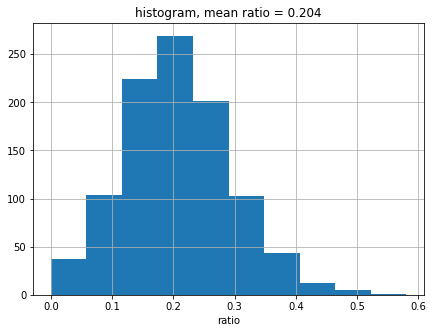

In [16]:
ratio_df = pd.DataFrame({'sample_ratio' : samples_df['y']/samples_df['N']})
plt.figure()
hist_axes = ratio_df.hist(figsize=(7, 5), sharey=True, sharex=True)
mean_ratio = ratio_df.mean()
plt.xlabel("ratio")
plt.title('histogram, mean ratio = {:.3}'.format(mean_ratio.values[0]))

A normal distribution with mean $\mu$=0.2 and standard deviation $\sigma$=0.07 was used to determine the values of prior. The  $\mu$ was chosen based on prior knowledge ("Typical effects of administering certain vaccine result in an allergic reaction in 20% cases on average") while $\sigma$ was selected to ensure that the values were clustered tighly around the mean. </br>
Based on the results, it can be concluded that the mean value of the ratio is consistent with prior knowledge.

### Modeling posterior and posterior predictive distribution 

In [17]:
gen_quant = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [18]:
N = 50
samples = gen_quant.sample(data={'N' : N, 'y' : 7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [19]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-23.5859,0.935687,0.966483,2.0,3.0,0.0,23.5942,0.237846,13.0
1,-22.8550,1.000000,0.966483,1.0,1.0,0.0,23.3848,0.209374,11.0
2,-24.1653,0.401786,0.966483,1.0,3.0,0.0,26.8587,0.098315,7.0
3,-22.8850,0.860043,0.966483,1.0,3.0,0.0,26.1533,0.210897,13.0
4,-22.9372,0.983599,0.966483,1.0,1.0,0.0,23.0486,0.213430,11.0
...,...,...,...,...,...,...,...,...,...
3995,-22.4964,0.942943,0.936331,2.0,3.0,0.0,22.8480,0.159838,3.0
3996,-22.8826,0.930422,0.936331,1.0,3.0,0.0,22.9399,0.132750,7.0
3997,-22.5823,0.958304,0.936331,1.0,3.0,0.0,23.3315,0.191385,10.0
3998,-22.5823,0.847159,0.936331,1.0,1.0,0.0,22.9709,0.191385,5.0


Text(0.5, 1.0, 'histogram, mean ratio = 0.168')

<Figure size 432x288 with 0 Axes>

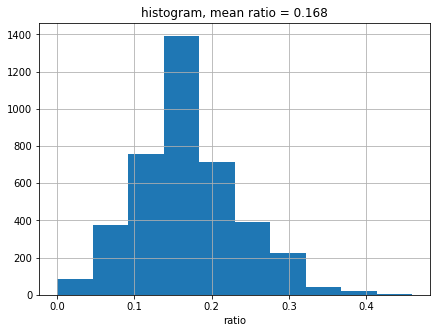

In [20]:
ratio_df = pd.DataFrame({'sample_ratio' : samples_df['y_pred'] / N})
plt.figure()
hist_axes = ratio_df.hist(figsize=(7, 5), sharey=True, sharex=True)
mean_ratio = ratio_df.mean()
plt.xlabel("ratio")
plt.title('histogram, mean ratio = {:.3}'.format(mean_ratio.values[0]))

In [21]:
sample_ratio_np = ratio_df['sample_ratio'].to_numpy()
p_np = samples_df['p'].to_numpy()

ratio_hdi = az.hdi(sample_ratio_np, hdi_prob=0.94)
p_hdi = az.hdi(p_np, hdi_prob=0.94)
mean_p = np.mean(p_np)

print("------------------------- ratio ----------------------------------")
print("Expected value: ", mean_ratio)
print("94% density interval of the predicted ratio: ", ratio_hdi)

print()

print("------------------------- p -------------------------")
print("Expected value: ", mean_p)
print("94% density interval of the predicted ratio: ", p_hdi)

print("Probability that ratio is lower than the average probability from traditional vaccines: {:.3}".format(np.mean(sample_ratio_np < 0.2)))

------------------------- ratio ----------------------------------
Expected value:  sample_ratio    0.167825
dtype: float64
94% density interval of the predicted ratio:  [0.06 0.3 ]

------------------------- p -------------------------
Expected value:  0.166427793525
94% density interval of the predicted ratio:  [0.0859856 0.243265 ]
Probability that ratio is lower than the average probability from traditional vaccines: 0.651
